In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris_labels = iris["species"]
iris = iris.drop("species", axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
scaler = StandardScaler()
scaler.fit(iris)
scaled_iris = scaler.transform(iris)

In [11]:
pca = PCA(n_components=3)

In [12]:
pca.fit(scaled_iris)

PCA(n_components=3)

In [13]:
X_pca = pca.transform(scaled_iris)

In [14]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [25]:
df = pd.DataFrame(X_pca, columns=("PC1", "PC2", "PC3"))

In [26]:
df.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


<Axes: xlabel='PC1', ylabel='PC2'>

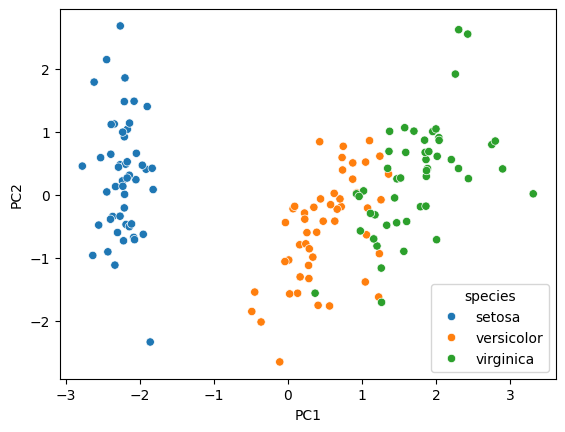

In [30]:
sns.scatterplot(df, x="PC1", y="PC2", hue=iris_labels)

<Axes: xlabel='PC1', ylabel='PC3'>

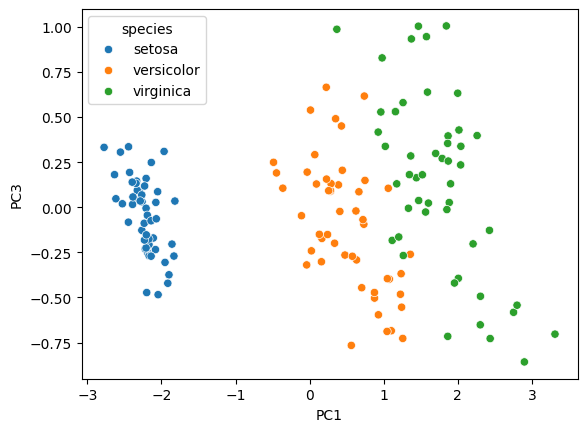

In [31]:
sns.scatterplot(df, x="PC1", y="PC3", hue=iris_labels)

<Axes: xlabel='PC2', ylabel='PC3'>

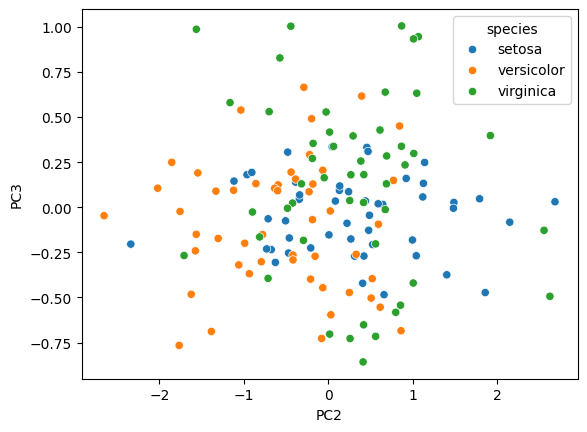

In [32]:
sns.scatterplot(df, x="PC2", y="PC3", hue=iris_labels)

Text(0, 0.5, 'Expained Variance %')

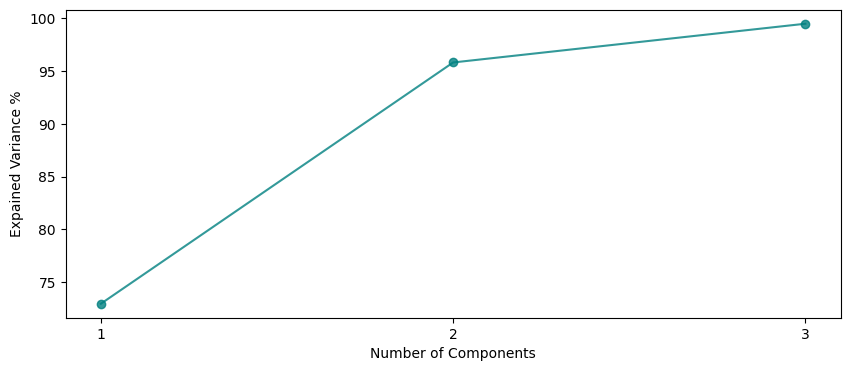

In [43]:
fig = plt.figure(figsize = (10,4))
plt.plot(np.arange(1, df.shape[1]+1),100 * np.cumsum(pca.explained_variance_ratio_), marker = 'o',
         color = 'teal', alpha = .8)
plt.xticks(np.arange(1, df.shape[1]+1),np.arange(1, df.shape[1]+1))
plt.xlabel('Number of Components')
plt.ylabel('Expained Variance %')

<Axes: >

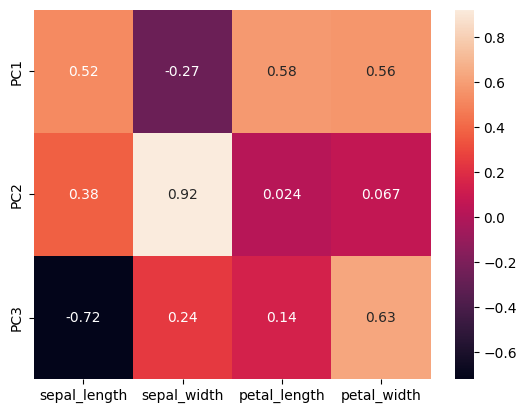

In [57]:
comp_df = pd.DataFrame(pca.components_, columns=iris.columns, index=df.columns) 
sns.heatmap(comp_df, annot=True)